# Data Science & Business Analytics Internship : The Spark Foundation

# Author : Saranya R

# Task 1 : Prediction using supervised ML
 
     * Predict the percentage of a student based on the no.of study hours.
     * What will be predicted score if a student studies for 9.25hrs/day?

In [3]:
#importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
#reading the data of students
student_data = pd.read_csv(r"C:\Users\Admin\Downloads\T1.csv")
print("Data imported successfully")

#reading the first 10 rows of the dataset
student_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [15]:
#check is there any null value in the data set
student_data.isnull == True

False

Since,there is no null data in the dataset so now we can visualise the data now

# Visualising the dataset

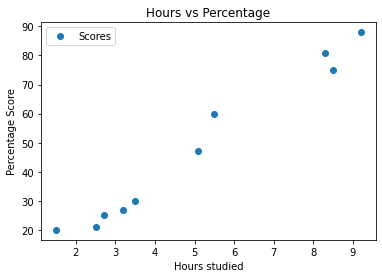

In [16]:
#plotting the distribution of scores
student_data.plot(x="Hours" , y="Scores",style="o")
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.show()
                

In [17]:
#we can use .corr to determine the correlation between the two variables
student_data.corr()

,Hours,Scores
Hours,1.000000,0.987157
Scores,0.987157,1.000000


From the above plot,we can see the correlation between the number of hours studied and the percentage of score

# Preparing the data

In [18]:
#using iloc function to divide the data into "features"(input) and "labels"(output)
X = student_data.iloc[:,:-1].values
y = student_data.iloc[:, 1].values

In [19]:
#splitting the dataset into training data and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)


# Training the algorithm

In [20]:
#Training the data
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#fitting the data into the model
model.fit(X_train, y_train)

print("Training completed.")

Training completed.


# Visualising the model

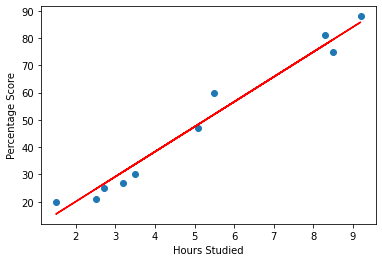

In [11]:
#plotting the regression line using y=mx+c
r_line = model.coef_*X + model.intercept_
plt.scatter(X , y)
plt.plot(X, r_line,color = 'red');
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

# Making Predictions

In [12]:
#making predictions
print(X_test)
y_pred = model.predict(X_test)

[[3.2]
 [8.3]]


In [24]:
y_test

array([27, 81], dtype=int64)

In [25]:
y_pred

array([31.02850627, 77.58950969])

In [26]:
#comparing predicted vs actual marks
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,27,31.028506
1,81,77.589510


# Solving the problem

In [28]:
#testing with our own data
hours = 9.25
ans = model.predict([[hours]])
print("Predicted score if a student for 9.25 hours = {}".format(round(ans[0],4)))

Predicted score if a student for 9.25 hours = 86.2626


# Evaluating the Error

In [31]:
#evaluating the trained model by calculating mean absolute error
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 3.7194982896237097
